### Imports

In [1]:
### imported Libraries
import pandas as pd
import importlib
import sqlite3
import datetime

from matplotlib import pyplot as plt
from pprint import pprint
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

### Sklearn imported libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Imported Scripts
import utils

%load_ext autoreload
%autoreload 2

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\utilizador\\Desktop\\ac-feup\\jupyters\\utils.py'>

### Get Dataframe

In [2]:
### Full train dataset
con = sqlite3.connect("../database/banking_data")
train = pd.read_sql_query("SELECT * FROM loan_united_train", con)


### Subdataset for clustered columns (select either 2 ou 3 columns)
cols = ["avg no. trans","avg balance","loan_amount"]
# cols = ["avg balance","loan_amount"]

df = pd.DataFrame()
df = train[cols]

### Apply Scaler to the columns 
scaler = MinMaxScaler()
transf = scaler.fit_transform(df)
df = pd.DataFrame(transf,index=df.index,columns=df.columns)

### Elbow Technique

C:\Users\utilizador\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


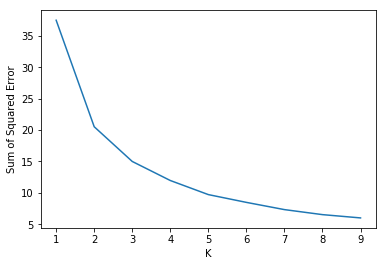

In [3]:
### Using Elbow method to find the amount of clusters to use

### Calculating the sum of squared error
k_range = range(1,10)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

### PLotting a graph to find the K value to be used
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)

### The K value should be the one where the line slope changes the most (in this case it is 2) 

### Create a column with k clusters

In [4]:
### Applly the Kmeans clustering algorithm
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df)

### Creating a final dataframe with the cluster column
final_df = df.copy()
final_df["cluster"] = y

### Scatter plot to display the clustered data

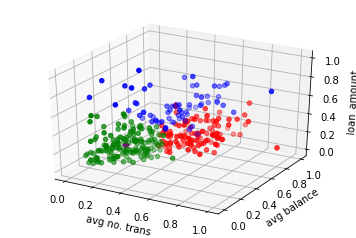

In [5]:
colors = ["r","g","b","y"]

if(len(cols) == 3):

    ax = plt.axes(projection='3d')

    for i in range(3):
        x = final_df[final_df["cluster"] == i][final_df.columns[0]]
        y = final_df[final_df["cluster"] == i][final_df.columns[1]]
        z = final_df[final_df["cluster"] == i][final_df.columns[2]]

        ax.scatter3D(x, y, z, marker="o", c=colors[i]);
        ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color="Purple", marker="D",label="centroid")

    ax.set_xlabel(final_df.columns[0])
    ax.set_ylabel(final_df.columns[1])
    ax.set_zlabel(final_df.columns[2])

    
elif(len(cols) == 2):
    for i in range(3):
        x = final_df[final_df["cluster"] == i][final_df.columns[0]]
        y = final_df[final_df["cluster"] == i][final_df.columns[1]]
        z = final_df[final_df["cluster"] == i][final_df.columns[2]]

        plt.scatter(x, y, marker="o", c=colors[i])
        plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="Purple", marker="D",label="centroid")

    plt.xlabel(final_df.columns[0])
    plt.ylabel(final_df.columns[1])


plt.show()

